In [ ]:
!pip install validclust

In [ ]:
import cv2
import numpy
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow import keras
import tensorflow as tf
from sklearn.metrics import silhouette_samples, silhouette_score
from validclust import dunn
from sklearn.metrics import pairwise_distances

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

In [ ]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

In [ ]:
X_train = X_train/255.0
X_test  = X_test/255.0

In [ ]:
X_test.shape

(10000, 32, 32)

In [ ]:
x_test = np.array(X_test.reshape(10000,1024))
x_test.shape

(10000, 1024)

In [ ]:
def eucledian_distance(x1,x2):
  return numpy.linalg.norm(x1-x2)

In [ ]:
max_iter = 100

In [ ]:
def kmeans(X, K):
  centroids = getRandomCentroids(X, K)
  distances = findDistances(X, centroids)
  points = assignPoints(distances)

  for i in range(max_iter):
    clusters = createClusters(X, centroids, K, points, distances)

  return points

In [ ]:
def getRandomCentroids(X, K):
  centroids = []
  idx = np.random.choice(len(X), K, replace=False)
  centroids = X[idx, :]
  return centroids

In [ ]:
def findDistances(X, centroids):
  dist = []
  dist = [[eucledian_distance(X[j], centroids[i])for i in range(len(centroids))]for j in range(len(X))]
  return dist

In [ ]:
def assignPoints(distances):
  points = []
  for i in distances:
    points.append(np.argmin(i))
  
  return np.array(points)

In [ ]:
def createClusters(X, centroids, K, points, distances):
  update_cent = []

  for i in range(K):
    temp = []
    indices = [z for z in range(len(points)) if points[z] == i]
    for j in indices:
        temp.append(X[j])
    cent = np.mean(np.array(temp), axis = 0)
    update_cent.append(cent)
  
  centroids = np.vstack(centroids)
  distances = [[eucledian_distance(X[j], centroids[i])for i in range(len(centroids))]for j in range(len(X))]
  points = np.array([np.argmin(i) for i in distances])

In [ ]:
l = kmeans(x_test, 10)

In [ ]:
print(f'Silhouette Score(n=10): {silhouette_score(x_test, l)}')

Silhouette Score(n=10): 0.05105886980891228


In [ ]:
dist = pairwise_distances(x_test)
dunn(dist, l)

0.08936835

Part 2 - Autoencoders

In [ ]:
print(X_train.shape)

(50000, 32, 32)


In [ ]:
input_img = keras.Input(shape=(32,32,1))
x = keras.layers.Flatten()(input_img)
encoded = keras.layers.Dense(256, activation='relu')(x)

decoded = keras.layers.Dense(1024, activation='sigmoid')(encoded)
decoded = keras.layers.Reshape((32,32,1))(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 1024)              263168    
                                                                 
 reshape (Reshape)           (None, 32, 32, 1)         0         
                                                                 
Total params: 525,568
Trainable params: 525,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(X_train, X_train, epochs=20, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6072 - val_loss: 0.5879
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5840 - val_loss: 0.5825
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5806 - val_loss: 0.5805
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5790 - val_loss: 0.5795
Epoch 5/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5782 - val_loss: 0.5785
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5776 - val_loss: 0.5794
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5772 - val_loss: 0.5783
Epoch 8/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5770 - val_loss: 0.5784
Epoch 9/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5769 - val_loss: 0.5783
Epoch 10/20
1563/1563 [==============================] - 15s 9ms/step - l

In [ ]:
pred = autoencoder.predict(X_test)

In [ ]:
pred.shape

(10000, 32, 32, 1)

In [ ]:
y_pred = pred.reshape((10000,1024))
print(y_pred.shape)

(10000, 1024)


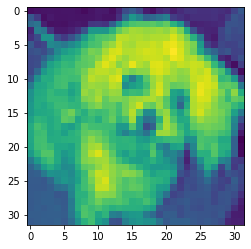

In [ ]:
plt.imshow(X_test[1000])

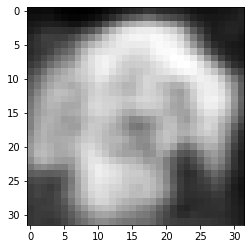

In [ ]:
plt.imshow(y_pred[1000].reshape(32, 32), cmap="gray")

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(y_pred)

In [ ]:
l2 = kmeans.labels_

In [ ]:
test = X_test.reshape(10000,1024)

In [ ]:
print(f'Silhouette Score(n=3): {silhouette_score(test, l2)}')

Silhouette Score(n=3): 0.05319574102759361
